In [171]:

np.random.seed(1)
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import string
import emoji
import pandas as pd
import re, string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

ps = nltk.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings("ignore")

import os
stop=set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/hasana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hasana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Read the Data

In [172]:
test_data = pd.read_csv('../data/tweet_data.csv')

In [173]:
train_data =  pd.read_csv('../data/train.csv')

### Data INFORMATION

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   worker_id             1025 non-null   object 
 1   task_id               1025 non-null   object 
 2   task_response_id      1025 non-null   object 
 3   is_reviewed           1025 non-null   bool   
 4   review_score          0 non-null      float64
 5   tweet_id              1025 non-null   int64  
 6   text                  1025 non-null   object 
 7   username              1025 non-null   object 
 8   bio                   866 non-null    object 
 9   Categorize the tweet  1025 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 73.2+ KB


In [175]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50001 non-null  int64 
 1   Date        50001 non-null  object
 2   User        50001 non-null  object
 3   Tweet       50001 non-null  object
 4   Location    2028 non-null   object
 5   HashTags    49997 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [176]:
test_data.head()

,Unnamed: 0,Date,User,Tweet,Location,HashTags
0,0,2022-07-09 23:50:33+00:00,club_southside,It's always great to get together with the @Th...,"Indianapolis, IN",['AbortionRightsAreHumanRights']
1,1,2022-07-09 23:49:00+00:00,GenZOregonizers,we’re pissed and ready to mobilize. \n\n#VoteT...,NaN,"['VoteThemOut', 'AbortTheCourt', 'BansOffOurBo..."
2,2,2022-07-09 23:42:55+00:00,cyddahlia,To stand in solidarity with those who were in ...,NaN,"['NFTGiveaway', 'abortionrights', 'AbortionRig..."
3,3,2022-07-09 23:42:07+00:00,shannonselby1,@AshleyRParker @yabutaleb7 @tylerpager Why is ...,NaN,"['AbortionRightsAreHumanRights', 'ExpandSCOTUS']"
4,4,2022-07-09 23:41:39+00:00,queenRobina,#WomensRights #AbortionRightsAreHumanRights I ...,NaN,"['WomensRights', 'AbortionRightsAreHumanRights']"


In [177]:
train_data.head()

,worker_id,task_id,task_response_id,is_reviewed,review_score,tweet_id,text,username,bio,Categorize the tweet
0,4TG67HVWJNDP,909fc038-d4fd-45f0-b849-d975760f163d,02dcb39a-c525-418a-9198-5c08d354935a,True,NaN,1540795861126352898,It getting pregnant endangers your life......\...,AChristhope,Humankind is neither humane nor kind. Creator ...,Pro-life
1,2AZWNZRTVACE,0dcd0bda-127d-4b57-a479-08efc85fb902,031abcc4-deb2-42b2-8b36-979f77d006c6,False,NaN,1540784525864669186,@bluekat323 @leighmatsell @caambers @Robthefro...,LegalLatino2022,Left January 2021. Starting anew. Love all ani...,Pro-life
2,6CNHTCG6W6XM,8617b170-4d3a-4789-b020-c51c0ce1e7c9,035e1a0b-fec5-4c88-81a4-6a79ba4c1d2f,False,NaN,1540795218097688576,@JoeBiden Dont you have the power to make an e...,Sploiv,i dont fuckin know anymore,Pro-choice
3,7R2NKCJQNXPP,851318f8-7671-4f45-9a98-58ebe7013de1,037c1004-9dd9-4bce-a792-adffb278be86,False,NaN,1540795712610258944,https://t.co/2vL1gxc3P3,AuntyLush,Judge jury and old joyce ~~ She/her,Pro-choice
4,X6P6DQRXD62A,a42881d0-a01a-4c7c-acfa-9d21434b59b0,03d7bc4f-4fd0-4658-bf0f-3151150d6d41,False,NaN,1540796129725427715,The overturning of Roe was not an attack on wo...,parlermaid,NaN,Pro-life


### Rename target column in train data to `sentiment` and convert its values to binary

In [178]:
train_data.rename(columns = {'Categorize the tweet':'sentiments'}, inplace = True)
def assign_sentiment(score):
    if score == 'Pro-life':
        return 1
    return 0

train_data['sentiments']=train_data['sentiments'].apply(lambda x: assign_sentiment(x))
train_data['sentiments'].value_counts()

0    744
1    281
Name: sentiments, dtype: int64

In [179]:
test_data.describe()

,Unnamed: 0
count,50001.000000
mean,25000.000000
std,14434.189742
min,0.000000
25%,12500.000000
50%,25000.000000
75%,37500.000000
max,50000.000000


#### Clean Data and Preprocess

In [180]:
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en']) 

def clean_preprocess_text(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''

  text = text.lower().replace('\n', ' ')
  text = re.sub('\[.*?\]', ' ', str(text))
  text = re.sub('https?://\S+|www\.\S+', '', str(text))
  text = re.sub('<.*?>+', ' ', str(text))
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', str(text))
  text = re.sub('\n', ' ', str(text))
  text = re.sub('\w*\d\w*', '', str(text))
  text = re.sub(r"https\S+|www\S+https\S+", ' ',text, flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#',' ',str(text))
  text = re.sub(r'[^\w\s]',' ',str(text))
  text = re.sub(r'[^\w\s]','',str(text))

  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  stem_text = [ps.stem(word) for word in filtered_text]
  return " ".join(stem_text)


In [181]:

def clean_pipeline(data, tweets_column):
    tweets = data[str(tweets_column)]
    data["mention"] = tweets.apply(lambda x: re.findall(r"@(\w+)", x))
    data["emojis"] = tweets.apply(lambda x: extract_emojis(x))

    clean_tweet = tweets.apply(lambda x: re.sub("@[A-Za-z0-9_]+"," ", x))
    clean_tweet = clean_tweet.apply(lambda x: re.sub("#[A-Za-z0-9_]+"," ", x))

    clean_tweet = clean_tweet.apply(lambda x: re.sub("http\S+", " http ",  x))
    clean_tweet = clean_tweet.str.encode('ascii', 'ignore').str.decode('ascii')

    clean_tweet = clean_tweet.apply(lambda x: clean_preprocess_text(x))
    data['clean_tweet'] = clean_tweet
    return None


In [182]:
clean_pipeline(test_data, 'Tweet')
clean_pipeline(train_data, 'text')

### Feature Engineering
- number of mentions
- number of hastags
- number of emojis
- number of stopping words
- number of verbs
- number of punctuation


In [183]:
test_data.emojis.unique()

array(['', '❤😂', '🤬', ..., '💔💔🥺🥺🥺', '✊🏼✊🏼✊🏼✊🏼✊🏼👄', '🤣🟩⬜🟪🟩⬜🟪🟩⬜🟪'],
      dtype=object)

### Modelling
- SVM
- Vader
- Logisitc Regression


### Vader - Unsupervised Method

In [184]:
# Calculate polarity
# Import textblob
from textblob import Word, TextBlob

df_vader = test_data['clean_tweet'].to_frame().reset_index()
df_vader['polarity'] = df_vader ['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_vader['subjectivity'] = df_vader ['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df_vader[['clean_tweet', 'polarity', 'subjectivity']].head()

def assign_sentiment(polarity):
    if polarity > 0.5:
        return 1
    return 0

df_vader['polarity']= df_vader['polarity'].apply(lambda x: assign_sentiment(x))
df_vader.head()

,index,clean_tweet,polarity,subjectivity
0,0,alway great get togeth watch men women soccer ...,1,0.750000
1,1,piss readi mobil http,0,0.000000
2,2,stand solidar dc michigan state capitol today ...,0,0.000000
3,3,news women right demolish includ,0,0.535714
4,4,made tiktok canadian woman show support toward...,0,0.000000


In [185]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

### Split Training set for cross validation

In [186]:
train, test = train_test_split(train_data, test_size=0.2, random_state=1)
X_train = train['clean_tweet'].values
X_test = test['clean_tweet'].values
y_train = train['sentiments']
y_test = test['sentiments']

In [187]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result
    
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):
        
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

### 1. SVM with unigram Count Vecotrizer

In [188]:

vectorizer_ngram = CountVectorizer(analyzer = 'word',lowercase = True,ngram_range=(1, 1))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(vectorizer_ngram, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.6514598540145985

In [189]:
grid_svm.best_params_

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}

In [190]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.6514598540145985,
 'f1': 0.44604316546762585,
 'acc': 0.624390243902439,
 'precision': 0.43661971830985913,
 'recall': 0.45588235294117646}

In [191]:

roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

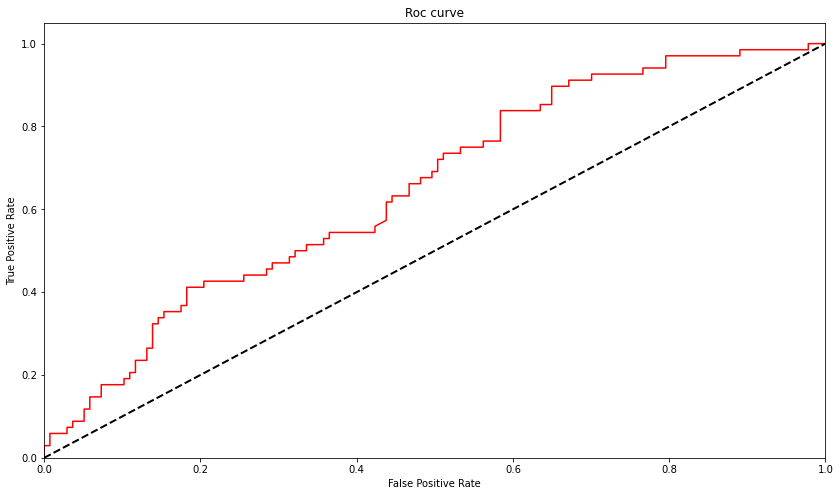

In [192]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

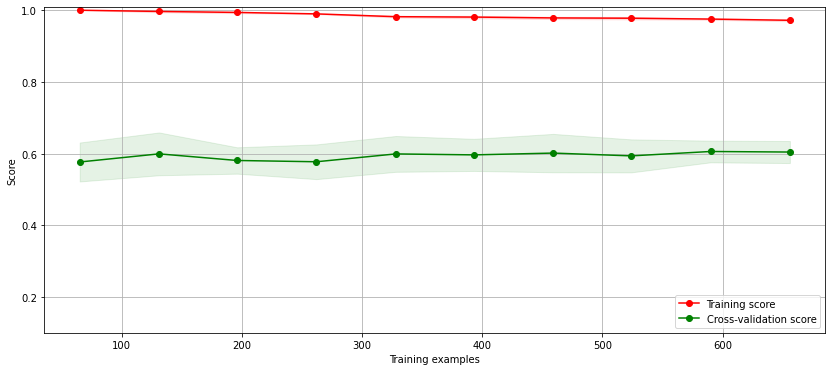

In [193]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [194]:
grid_svm.predict(test_data['Tweet'])

array([1, 1, 0, ..., 1, 1, 1])

### 2.  SVM with bigram Count Vecotrizer

In [195]:

vectorizer_bigram = CountVectorizer(analyzer = 'word',lowercase = True,ngram_range=(2, 2))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(vectorizer_bigram, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                     param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.582546157148991

In [196]:
grid_svm.best_params_

{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}

In [197]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.582546157148991,
 'f1': 0.31481481481481477,
 'acc': 0.6390243902439025,
 'precision': 0.425,
 'recall': 0.25}

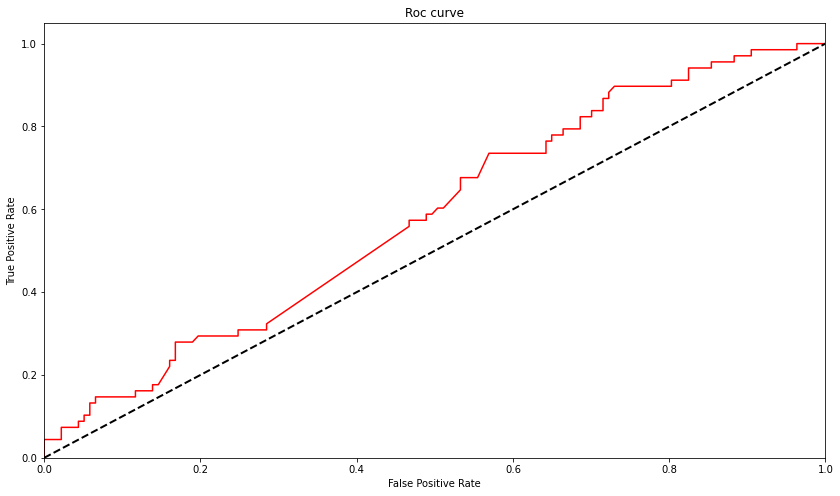

In [198]:

roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

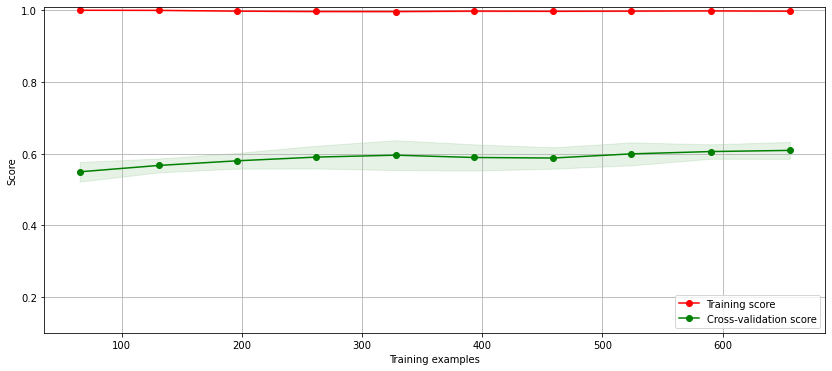

In [199]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [200]:
grid_svm.predict(test_data['Tweet'])

array([0, 0, 0, ..., 0, 0, 0])

### 3. SVM with bigram and Uni-gram Count Vecotrizer

In [201]:

vectorizer_bigram = CountVectorizer(analyzer = 'word',lowercase = True,ngram_range=(1, 2))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(vectorizer_bigram, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.6194718763417776

In [202]:
grid_svm.best_params_

{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}

In [203]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.6194718763417776,
 'f1': 0.4383561643835616,
 'acc': 0.6,
 'precision': 0.41025641025641024,
 'recall': 0.47058823529411764}

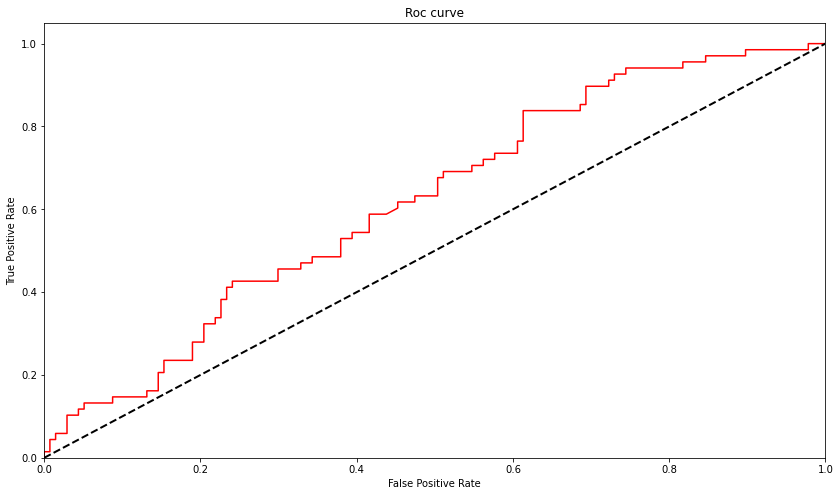

In [204]:

roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

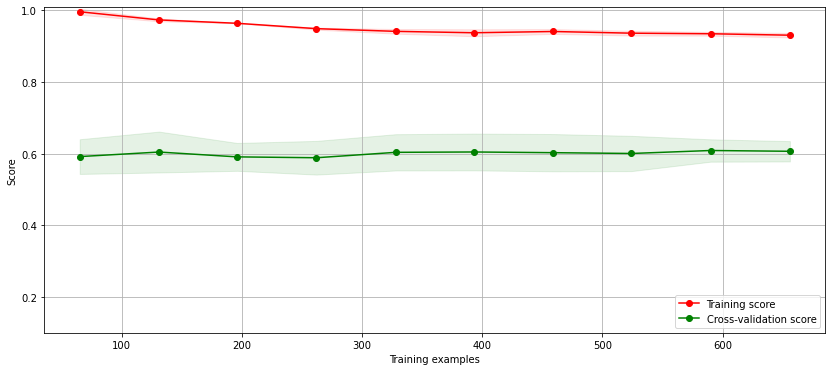

In [205]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [206]:
grid_svm.predict(test_data['Tweet'])

array([1, 0, 0, ..., 0, 1, 1])

### 4.SVM with TF-IDF Vecotrizer - Unigram

In [207]:

tf_vectorizer_unigram = TfidfVectorizer(analyzer = 'word',lowercase = True,ngram_range=(1, 1))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(tf_vectorizer_unigram, 
                            SVC(probability=True, class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.5812580506655217

In [208]:
grid_svm.best_params_

{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel': 'poly'}

In [209]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.41874194933447834,
 'f1': 0.4981684981684982,
 'acc': 0.33170731707317075,
 'precision': 0.33170731707317075,
 'recall': 1.0}

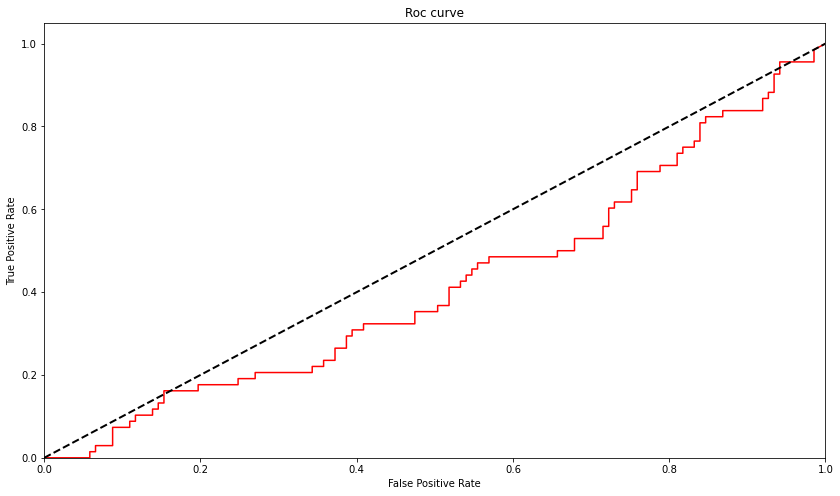

In [210]:

roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

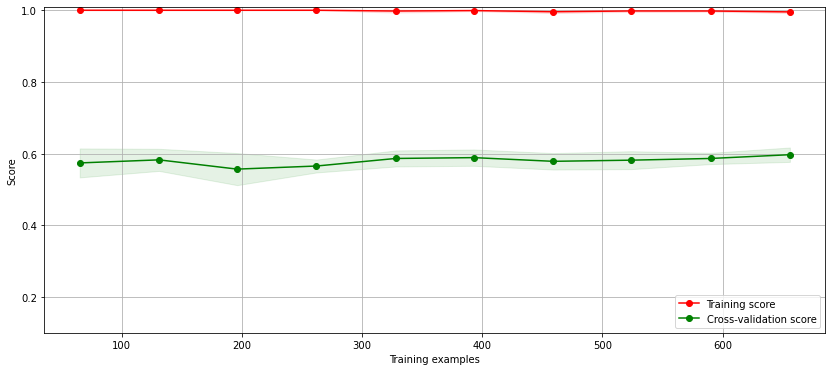

In [211]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [212]:
grid_svm.predict(test_data['Tweet'])

array([1, 1, 1, ..., 1, 1, 1])

### 5. SVM with TF-IDF Vecotrizer - Bigram

In [213]:

tf_vectorizer_unigram = TfidfVectorizer(analyzer = 'word',lowercase = True,ngram_range=(2,2))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(tf_vectorizer_unigram, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.5541004723057106

In [214]:
grid_svm.best_params_

{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'sigmoid'}

In [215]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.5541004723057106,
 'f1': 0.34234234234234234,
 'acc': 0.6439024390243903,
 'precision': 0.4418604651162791,
 'recall': 0.27941176470588236}

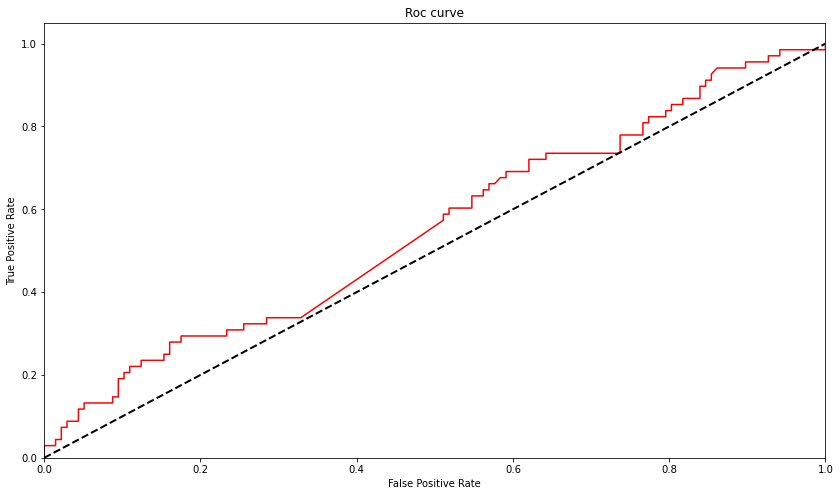

In [216]:

roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

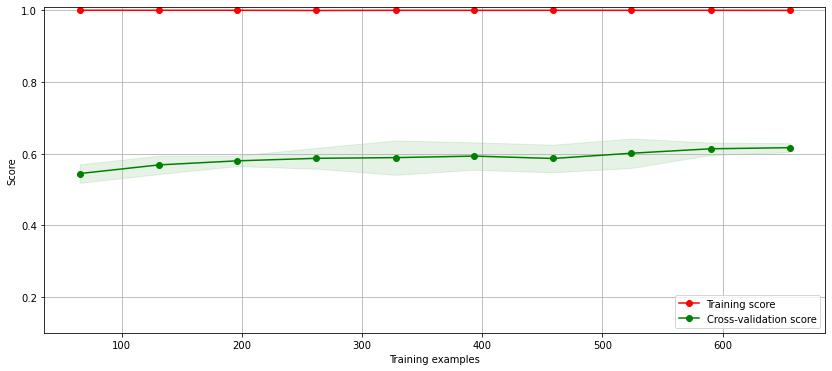

In [217]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [218]:
grid_svm.predict(test_data['Tweet'])

array([0, 0, 0, ..., 0, 0, 0])

### 6. SVM with TF-IDF Vecotrizer - Bigram and Unigram

In [219]:

tf_vectorizer_bigram = TfidfVectorizer(analyzer = 'word',lowercase = True,ngram_range=(1, 2))
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(tf_vectorizer_bigram, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                     param_grid = {'svc__C': [0.01, 0.1, 0.5, 1],
                                    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                    'svc__gamma': [1,0.1,0.01,0.001],},  
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


0.6062687848862173

In [220]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.3937312151137828,
 'f1': 0.5101214574898786,
 'acc': 0.4097560975609756,
 'precision': 0.35195530726256985,
 'recall': 0.9264705882352942}

In [221]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

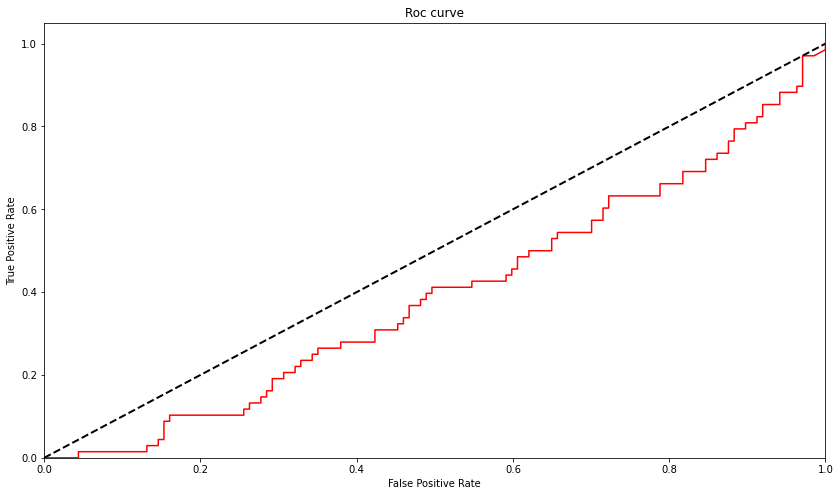

In [222]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()


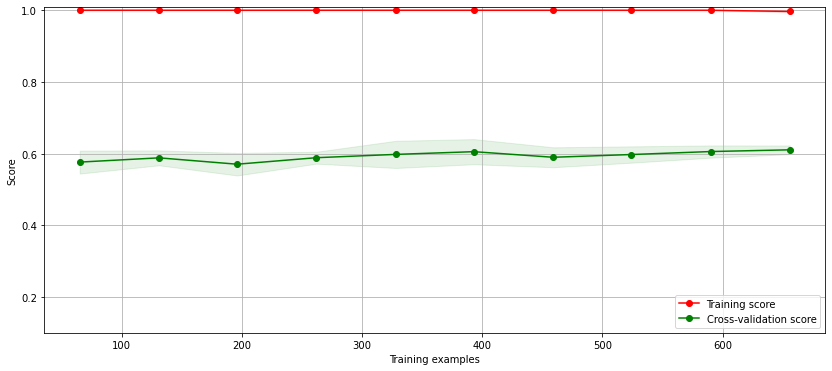

In [223]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.1, 1.01), figsize=(14,6))
plt.show()

In [224]:
grid_svm.predict(test_data['Tweet'])

array([1, 1, 1, ..., 1, 1, 1])